In [2]:
import requests
from bs4 import BeautifulSoup
import csv

In [3]:
URL = "https://www.zip-codes.com/county/pa-allegheny.asp"
r = requests.get(URL)
   
soup = BeautifulSoup(r.content, 'html5lib')

In [4]:
print(type(soup))

<class 'bs4.BeautifulSoup'>


'<!DOCTYPE html>\n<html lang="en" xmlns="https://www.w3.org/1999/xhtml">\n <head>\n  <title>\n   Allegheny County, PA - Pennsylvania ZIP Codes\n  </title>\n  <!-- Meta Tags for All -->\n  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>\n  <meta content="en-us" http-equiv="content-language"/>\n  <meta charset="utf-8"/>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <meta content="index,follow" name="robots"/>\n  <meta content="31" name="revisit-after"/>\n  <meta content="#959FD3" name="theme-color"/>\n  <link href="/m/manifest.json" rel="manifest"/>\n  <link href="/favicon.ico" rel="Shortcut Icon" type="image/x-icon"/>\n  <link href="/m/images/icon/icon-192.png" rel="icon" sizes="192x192"/>\n  <link href="/m/images/icon/icon-192.png" rel="apple-touch-icon"/>\n  <meta content="Allegheny County, PA zip codes. Detailed information on all the Zip Codes of Allegheny County." name="description"/>\n  <link href="https://www.zip-codes.com/county/pa-allegheny.a
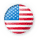

In [6]:
soup.prettify()


In [12]:
quotes=[]  # a list to store quotes
   
table = soup.find('table', attrs = {'class':'statTable'}) 

In [14]:
print(type(table))

<class 'bs4.element.Tag'>


In [20]:
table_body = table.find('tbody')

In [28]:
data = []
rows = table_body.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele]) # Get rid of empty values

In [36]:
#get column names

colnames = data[0]

data = data[1:]

In [45]:
#convert zip code names
converted_data = []
for i in data:
    zip = i[0].split(' ')[2]
    converted_data.append([zip, *i[1:]])


In [46]:
import pandas

In [47]:
df = pandas.DataFrame(converted_data, columns = colnames)

In [49]:
df.head()

,ZIP Code,Classification,City,Population,Timezone,Area Code(s)
0,15006,P.O. Box,Bairdford,240,Eastern,724
1,15007,General,Bakerstown,323,Eastern,724
2,15014,General,Brackenridge,"3,184",Eastern,724/878
3,15015,General,Bradfordwoods,"1,175",Eastern,724/412
4,15017,General,Bridgeville,"16,213",Eastern,412


In [50]:
df.to_csv('Zip Population Data')